## DBSCAN sample

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

Faking some data and normalize it:
-   use make_blobs to fake dataset
-   use StandardScaler to normalize it  

In [2]:
X, y = make_blobs(n_samples=1500, centers=[[4,3], [2,-1], [-1,4]], cluster_std=.6)
X = StandardScaler().fit_transform(X)
X[:5]

array([[-1.72517955,  0.8223192 ],
       [ 0.61392847,  0.41837778],
       [-1.38595903,  0.79537621],
       [ 0.90918813,  1.0713505 ],
       [ 0.81651566,  0.24679478]])

In [3]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
print(labels)
set(labels)

[0 1 0 ... 1 0 1]


{-1, 0, 1, 2}

when there is -1 in clusters it means there is outlier in our data

In [4]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [5]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [6]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

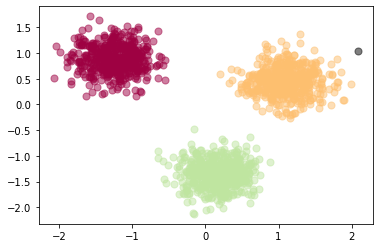

In [7]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers and borders
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

In [8]:
print(f"outliers count: {db.labels_[db.labels_ == -1].size}")
print(f"cluster_0 count: {db.labels_[db.labels_ == 0].size}")
print(f"cluster_1 count: {db.labels_[db.labels_ == 1].size}")
print(f"cluster_2 count: {db.labels_[db.labels_ == 2].size}")

outliers count: 1
cluster_0 count: 500
cluster_1 count: 499
cluster_2 count: 500
